Analysis inspired from:

**Gauge invariance of the Dicke and Hopfield models** 
_Garziano_, _Nori_, et al.
https://journals.aps.org/pra/pdf/10.1103/PhysRevA.102.023718

In [1]:
from numqt import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

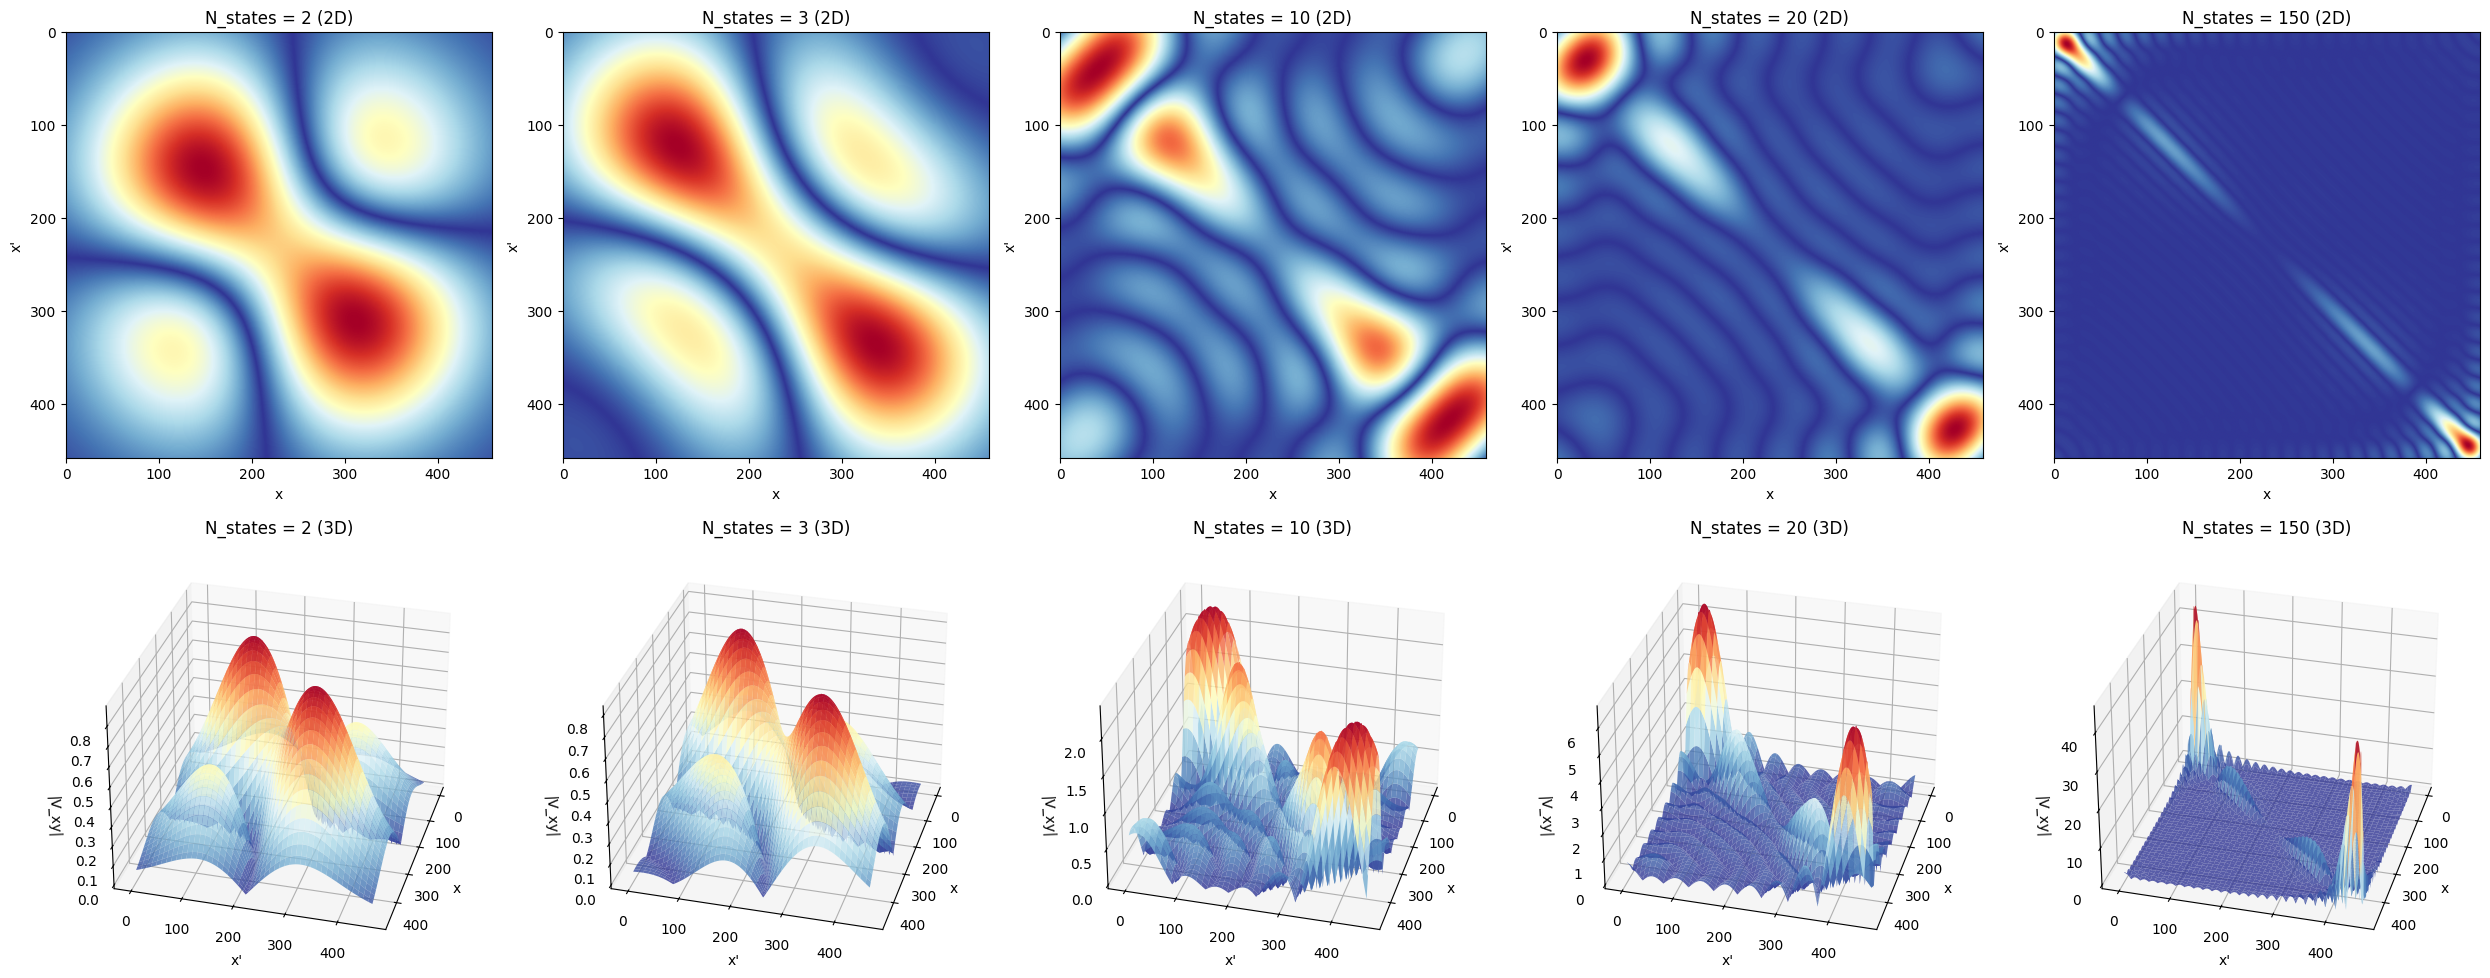

In [27]:
# ================================================================================================================================
#                                                Characteristic lengths of the problem
# ================================================================================================================================
Lx = 1 # Characteristic length along x
# ================================================================================================================================
#                                                        Problem's parameters
# ================================================================================================================================
hbar = 1
m = 1 # e-mass
wx = hbar / (m * Lx**2) # x confinement frequency
# ================================================================================================================================
#                                                        Simulation parameters
# ================================================================================================================================
bnd = 2.3 #(THIS PARAMETER IS HIGHLY IMPORTANT AND MUST BE CHOSEN CAREFULLY WHEN VARYING N_states: TOO SMALL AND THE WAVEFUNCTION HAS NO TIME TO DECAY, TOO LARGE AND INTEGRATION ACCUMULATES ERROR FROM INTEGRATING REGIONS OF |WAVEFUNCTION| < floating poin precision)
xbounds = (-bnd*Lx, bnd*Lx) 
dx = 0.01 # spacing
nx = int(np.abs(xbounds[1] - xbounds[0]) / dx)

# ================================================================================================================================
#                                                            Creating grid
# ================================================================================================================================
mesh_obj = Mesh(dims=1,
                 xbounds=xbounds,
                 nx=nx)

# ================================================================================================================================
#                                                            Plot V_xy for different N_states
# ================================================================================================================================
N_states_values = [2, 3, 10, 20, 150]

# Create subplots - 2 rows, 5 columns (top row: imshow, bottom row: 3D surface)
fig = plt.figure(figsize=(25, 10))

for i, N_states in enumerate(N_states_values):
    # ================================================================================================================================
    #                                                            Guess basis
    # ================================================================================================================================
    psi_fn = lambda n, mesh: ho_state(n, mesh, omega = wx, mass = m, hbar = hbar)
    basis = (psi_fn, N_states)
    # ================================================================================================================================
    #                                                            Operators
    # ================================================================================================================================
    operators = canonic_ops(mesh_obj, basis = basis, ops_to_compute = ["x2"], additional_subspaces = None, hbar=1, limit_divisions=10*nx, threshold = 1e-15)
    x2 = operators.get_ops()["x2"]
    
    # Potential
    #V = 0.5 * m * x2 * wx**2 
    V = -2.5 * x2  + 1 * x2@x2
    # Non-local potential
    psi_all = np.array([psi_fn(n, mesh_obj.mesh_x)[0] for n in range(N_states)]).T
    temp = psi_all @ V  # Shape: (n_mesh, N_states)
    V_xy = temp @ psi_all.T.conj()  # Shape: (n_mesh, n_mesh)
    Z = np.abs(V_xy)
    
    # 2D imshow plot (top row)
    ax1 = plt.subplot(2, 5, i+1)
    im = ax1.imshow(Z, cmap='RdYlBu_r')
    ax1.set_title(f'N_states = {N_states} (2D)')
    ax1.set_xlabel('x')
    ax1.set_ylabel("x'")
    
    # 3D surface plot (bottom row)
    ax2 = plt.subplot(2, 5, i+6, projection='3d')
    
    # Create meshgrid for 3D plotting
    x_indices = np.arange(V_xy.shape[1])
    y_indices = np.arange(V_xy.shape[0])
    X, Y = np.meshgrid(x_indices, y_indices)
    
    # Create 3D surface plot
    surf = ax2.plot_surface(X, Y, Z, cmap='RdYlBu_r', alpha=0.8)
    ax2.set_title(f'N_states = {N_states} (3D)')
    ax2.set_xlabel('x')
    ax2.set_ylabel("x'")
    ax2.set_zlabel('|V_xy|')
    ax2.view_init(azim=15)

plt.tight_layout()
plt.show()

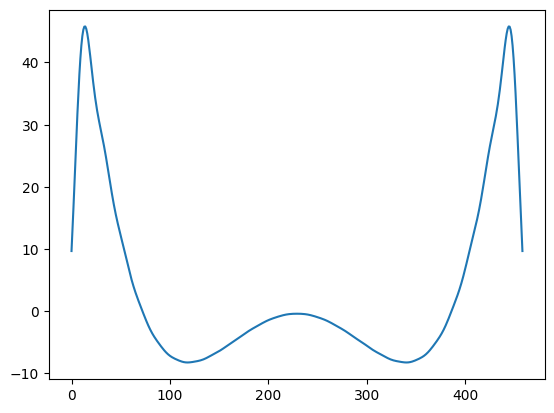

In [28]:
plt.plot(V_xy.diagonal())

In [15]:
wx

0.01